In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Assignment3/Data/Data

/content/drive/MyDrive/Assignment3/Data/Data


# Problem Statement

Our goal is to analyze student grades and predict whether they will pass or fail based on several features. These features include parental occupation, the distance between the student's home and the school, and their grades in math and language exams. By understanding which factors are most influential in determining whether a student will pass or fail, we can develop recommendations for students, and educators to improve overall student performance. To achieve this goal, we will use multiple linear regression and three different classification algorithms: Support Vector Machines (SVM), Random Forest (RF), and Naive Bayes (NB). We will split the dataset into a 30% testing set and a 70% training set before building the models. Finally, we will evaluate the performance of each algorithm and identify the most important features for predicting student success.

# Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

#importing Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import  GaussianNB
from sklearn.tree import DecisionTreeClassifier

#This is for splitting the data
from sklearn.model_selection import train_test_split, cross_val_score

#This is for evaluating our models
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve


# Read the dataset

In [2]:
# Load data
#histogram-box plt- work test - qq plot -> well shaped
data = pd.read_csv("/content/student-performance.csv")
data.head(5)

,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
0,math,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,4,3,4,3,6,5,6,6
1,math,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,5,3,3,3,4,5,5,6
2,math,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,4,3,2,3,10,7,8,10
3,math,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,5,2,15,14,15
4,math,F,16,U,GT3,T,3,3,other,other,...,yes,no,4,3,2,5,4,6,10,10


# Data preparation 

In [3]:
data.shape

(1044, 30)

In [4]:
data['absences'].describe(include=['O'])

count    1044.000000
mean        4.434866
std         6.210017
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        75.000000
Name: absences, dtype: float64

In [5]:
data.describe(include=['O']) #include other categorical columns

,subject,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2
top,Language,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes
freq,649,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827


 Statistical inferences from the table above :
 - Every column has count equal to 1044 so (there is no missing values). 
 - all columns have more than one value so they are importent.
 - NOTE::::::::::::::::The category "No" makes 83.9% which makes our data "unbalanced" in class label.

Print all columns name in the dataset

In [6]:
data.columns

Index(['subject', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

To know the data type of each column to know how to handle it

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject     1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Most columns (16) have an object data type and some (14) integer data type, which indicates that we have both

* Qualitative/categorical: nominal/ordinal
  - Categorical features

* Quantitative/numerical: discrete & interval/ratio
  - Numerical features: The rest of 14 features.

# Data cleaning and preparing 

### 1-checking duplicate

In [8]:
duplicate_record=data.duplicated()
sum(duplicate_record)

0

There is no duplicated records in the dataset.

 2-checking uniqeness

In [9]:
data.nunique()

subject        2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
famrel         5
freetime       5
goout          5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

no need to drop the because they contain more than one value.

In [10]:
data.isnull().sum()

subject       0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No null is no missing values in the columns

Add new column for pass or fail

In [11]:
data['newG'] = data['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

# Exploratory Data Analysis (EDA)

This Method determines the number of students in each feature of the dataset and displays a graph for it

In [12]:
def get_different_categories(data, Categorical_attribute):
    
    temp = data[Categorical_attribute].value_counts()
    print(temp)
    temp.plot.bar()

There are two subjects in this dataset, Mathematics and Language

Language    649
math        395
Name: subject, dtype: int64


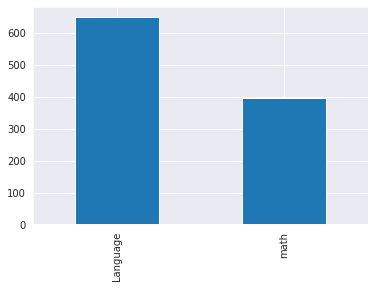

In [13]:
get_different_categories(data,'subject')

F    591
M    453
Name: sex, dtype: int64


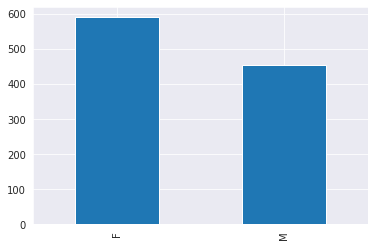

In [14]:
get_different_categories(data,'sex')

The number of Females is more than the number of Males by 138 Females

pass    814
fail    230
Name: newG, dtype: int64


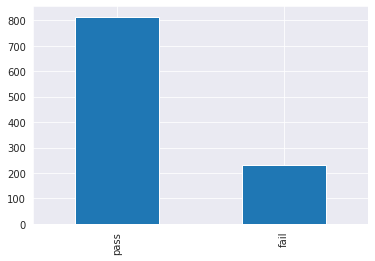

In [15]:
get_different_categories(data,'newG')

Most of the students(814) passed, and the rest(230) failed

<Axes: >

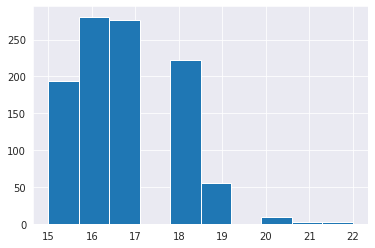

In [16]:
data["age"].hist()#histogram

no     824
yes    220
Name: paid, dtype: int64


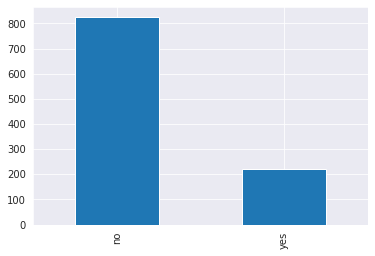

In [17]:
get_different_categories(data,'paid')

most of the students did not pay extra classes within the course

0    861
1    120
2     33
3     30
Name: failures, dtype: int64


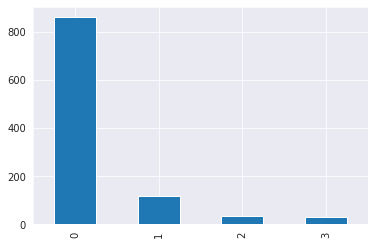

In [18]:
get_different_categories(data,'failures')

861 of the students never failed, 120 failed in one class only, 33 failed in two classes, and 30 failed in three classes

no     925
yes    119
Name: schoolsup, dtype: int64


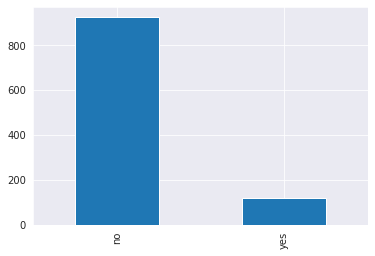

In [19]:
get_different_categories(data,'schoolsup')

925 student did not get extra educational support and 119 did

U    759
R    285
Name: address, dtype: int64


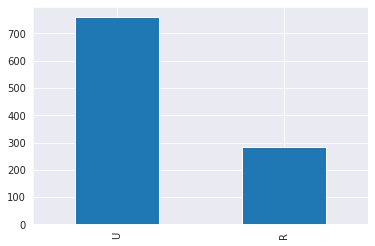

In [20]:
get_different_categories(data,'address')

Students address types "U" - urban or "R" - rural 

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64


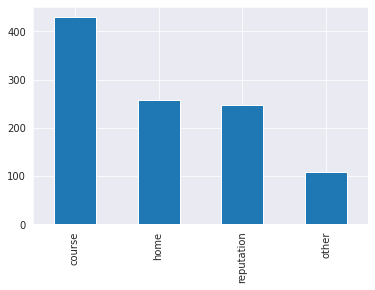

In [21]:
get_different_categories(data,'reason')

this graph shows why students choose this school 

# Convert strig values into Integer values

In [22]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
o=OrdinalEncoder()
l=LabelEncoder()

In [23]:
for i in data.columns:
    if data[i].dtypes=='O' and i!='newG':
        data[i]=o.fit_transform(data[i].values.reshape(-1,1))

#Encoding label column with label encoder
data['newG']=l.fit_transform(data['newG'])

#show the how the data looks
data.head(1000)

,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,famrel,freetime,goout,health,absences,G1,G2,G3,newG
0,1.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,...,0.0,4,3,4,3,6,5,6,6,0
1,1.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,...,1.0,5,3,3,3,4,5,5,6,0
2,1.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,...,1.0,4,3,2,3,10,7,8,10,1
3,1.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,...,1.0,3,2,2,5,2,15,14,15,1
4,1.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,...,0.0,4,3,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,17,0.0,0.0,1.0,1,1,2.0,3.0,...,0.0,4,2,3,4,4,12,13,14,1
996,0.0,0.0,18,1.0,0.0,1.0,2,2,2.0,2.0,...,1.0,1,3,1,2,4,8,8,10,1
997,0.0,0.0,18,1.0,1.0,1.0,2,2,3.0,3.0,...,1.0,5,4,5,3,0,11,12,13,1
998,0.0,0.0,18,0.0,1.0,0.0,4,2,4.0,2.0,...,1.0,5,3,1,5,0,5,0,0,0


# Exploring the relationship and correlations between variables

In [24]:
corr = data.corr()
corr

,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,famrel,freetime,goout,health,absences,G1,G2,G3,newG
subject,1.000000,0.062192,-0.018790,0.087916,-0.007705,0.029497,0.101246,0.094795,0.088938,0.031495,...,0.078377,0.007091,0.025949,-0.032011,0.006205,0.160125,-0.079727,-0.126459,-0.187166,-0.204814
sex,0.062192,1.000000,-0.038832,0.011556,0.094361,0.051337,0.109387,0.070786,0.169959,0.083938,...,0.062671,0.074725,0.181603,0.062530,0.141113,-0.013076,-0.025122,-0.025024,-0.031472,-0.024254
age,-0.018790,-0.038832,1.000000,-0.071257,0.013290,0.006887,-0.130196,-0.138521,-0.072088,-0.045305,...,-0.033229,0.007162,0.002645,0.118510,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,-0.134276
address,0.087916,0.011556,-0.071257,1.000000,0.054484,-0.074097,0.179720,0.124303,0.148470,-0.002097,...,0.194790,-0.016801,-0.009744,0.030790,-0.010895,0.036696,0.113113,0.127793,0.117696,0.073732
famsize,-0.007705,0.094361,0.013290,0.054484,1.000000,-0.207302,-0.025556,-0.047290,0.038054,-0.069065,...,0.008315,-0.005328,-0.007249,0.005889,-0.009147,0.018284,0.057610,0.057469,0.061209,0.047797
Pstatus,0.029497,0.051337,0.006887,-0.074097,-0.207302,1.000000,-0.077133,-0.049156,-0.035206,0.047796,...,0.065260,0.042448,0.038714,0.020498,0.016213,-0.113955,-0.000155,-0.010219,-0.030693,-0.026404
Medu,0.101246,0.109387,-0.130196,0.179720,-0.025556,-0.077133,1.000000,0.642063,0.462509,0.156851,...,0.249728,0.015004,0.001054,0.025614,-0.013254,0.059708,0.226101,0.224662,0.201472,0.106460
Fedu,0.094795,0.070786,-0.138521,0.124303,-0.047290,-0.049156,0.642063,1.000000,0.279218,0.209255,...,0.170012,0.013066,0.002142,0.030075,0.034288,0.040829,0.195898,0.182634,0.159796,0.105579
Mjob,0.088938,0.169959,-0.072088,0.148470,0.038054,-0.035206,0.462509,0.279218,1.000000,0.202347,...,0.250488,0.030417,0.077780,0.000316,0.075821,0.051644,0.130840,0.115321,0.105640,0.050875
Fjob,0.031495,0.083938,-0.045305,-0.002097,-0.069065,0.047796,0.156851,0.209255,0.202347,1.000000,...,0.072254,0.030325,-0.040575,-0.017461,-0.022271,-0.013009,0.084520,0.072577,0.040541,0.007012


<Axes: >

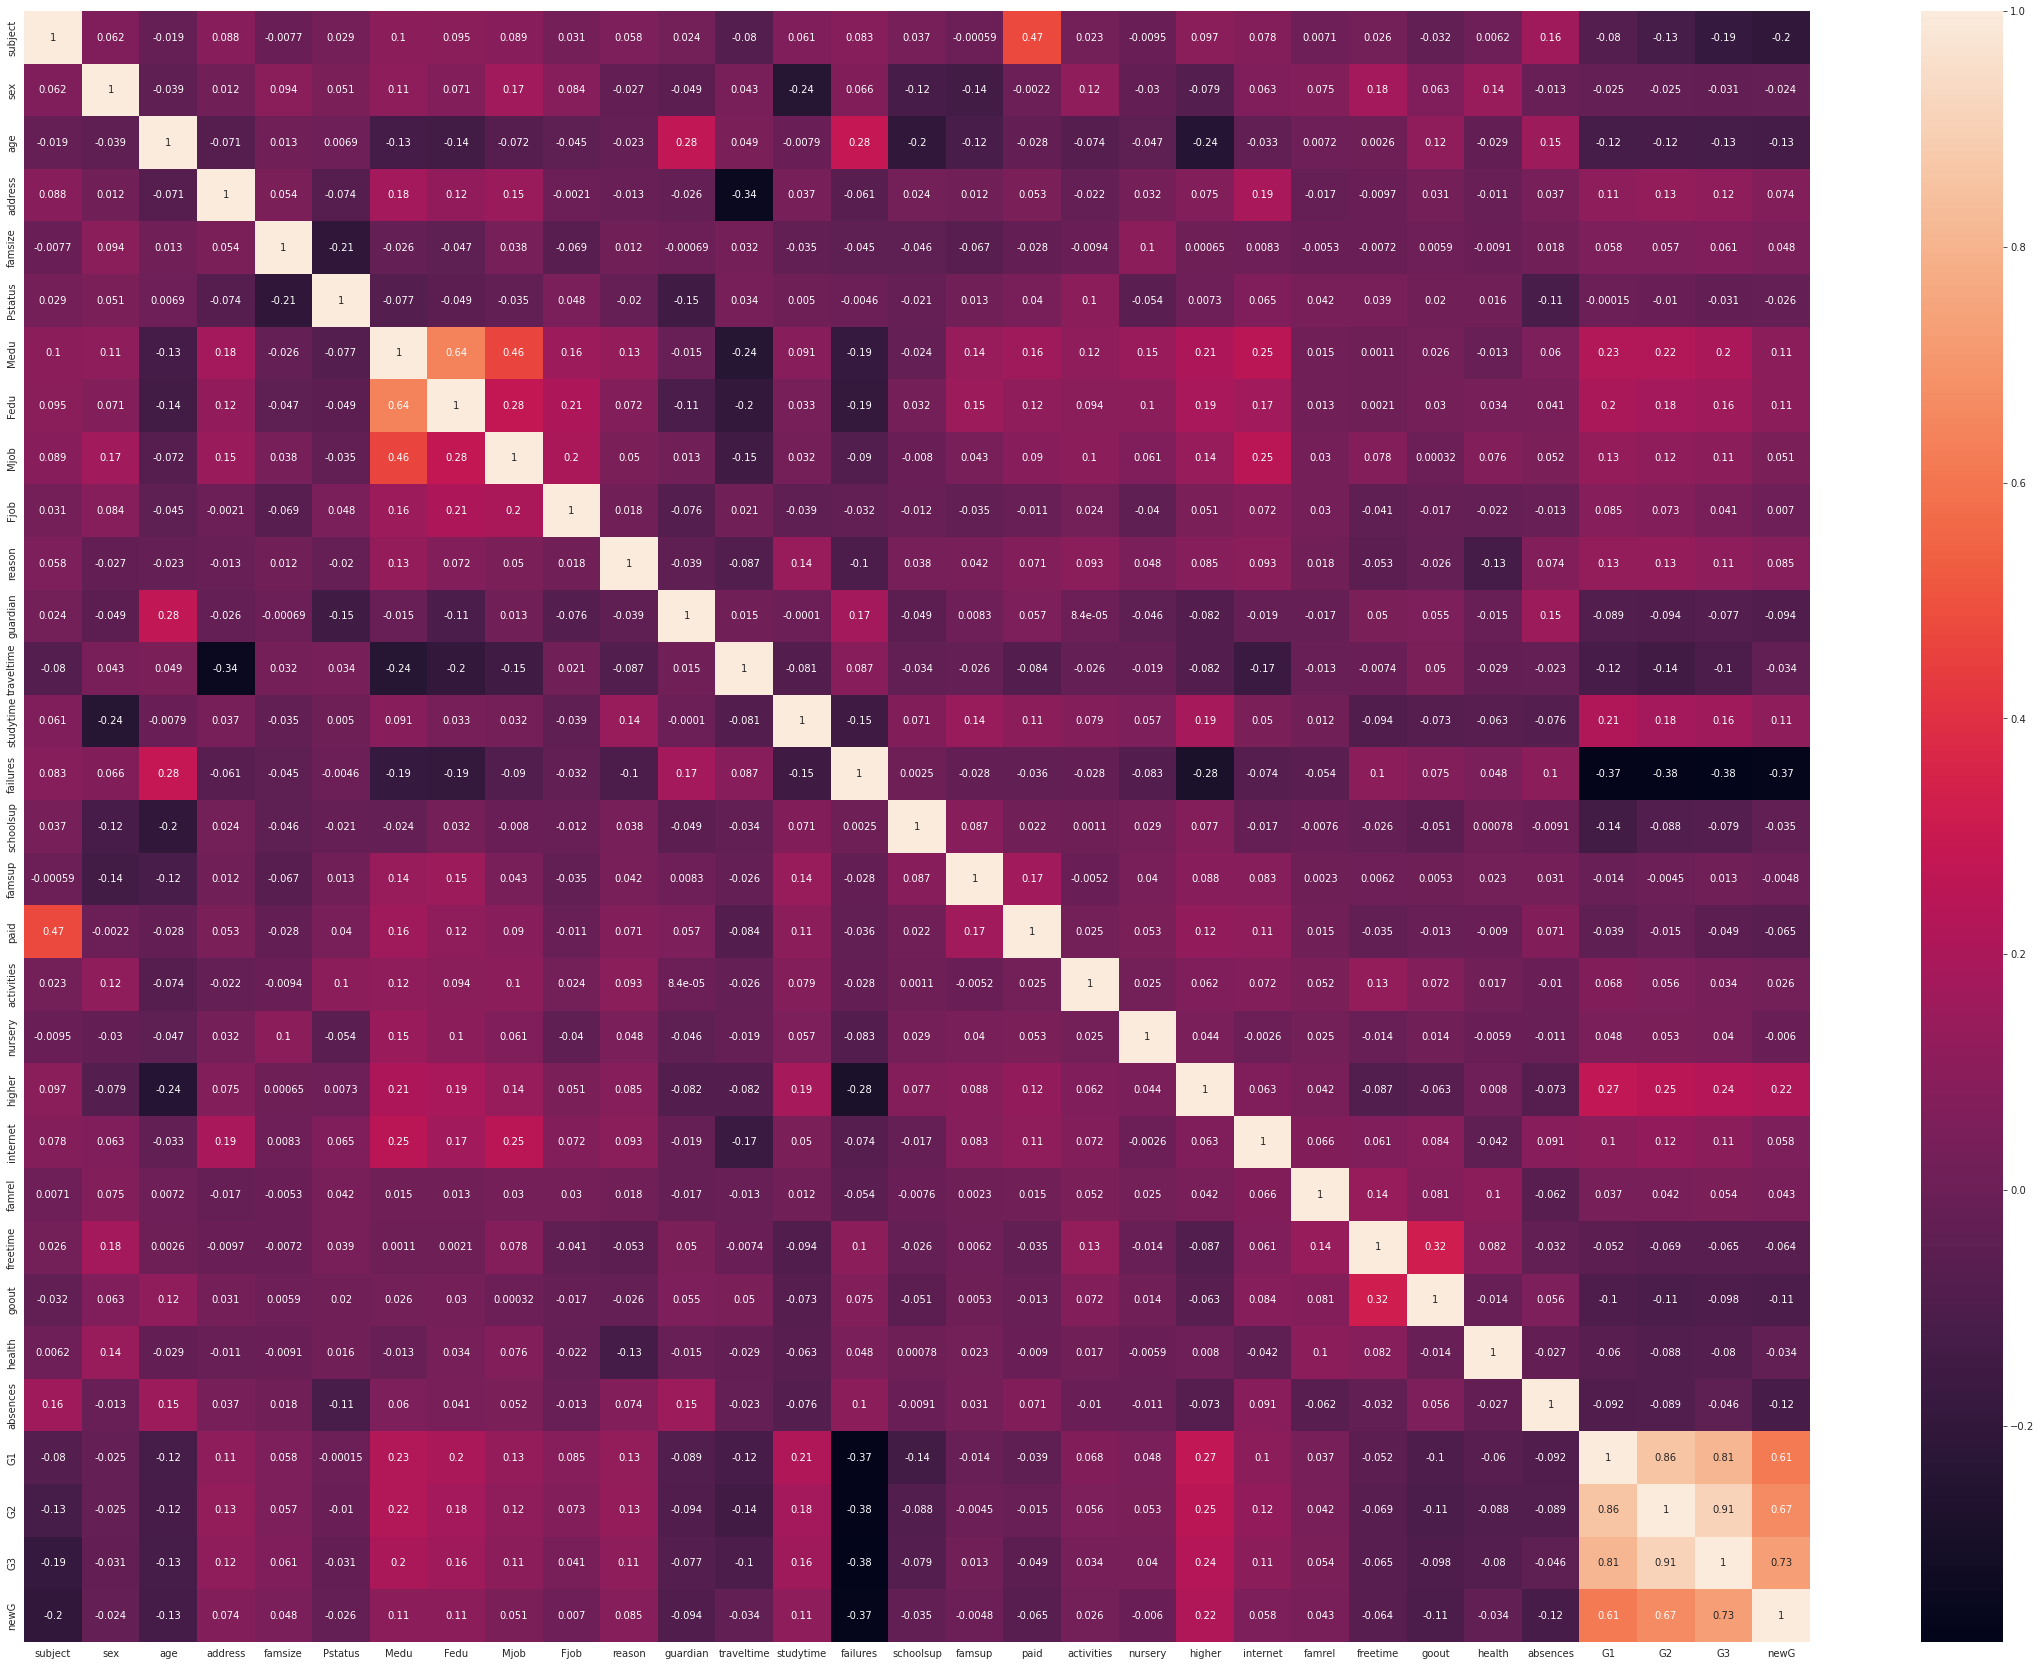

In [25]:
#Visualizing correlation 
plt.figure(figsize=(40,30))
sns.heatmap(data.corr(), annot=True)

In [26]:
data.drop('G1', axis=1, inplace=True) 
data.drop('G2', axis=1, inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject     1044 non-null   float64
 1   sex         1044 non-null   float64
 2   age         1044 non-null   int64  
 3   address     1044 non-null   float64
 4   famsize     1044 non-null   float64
 5   Pstatus     1044 non-null   float64
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   float64
 9   Fjob        1044 non-null   float64
 10  reason      1044 non-null   float64
 11  guardian    1044 non-null   float64
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   float64
 16  famsup      1044 non-null   float64
 17  paid        1044 non-null   float64
 18  activities  1044 non-null   float64
 19  nursery     1044 non-null  

In [27]:
corrnew=data.corr()
corrnew


,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,famrel,freetime,goout,health,absences,G3,newG
subject,1.000000,0.062192,-0.018790,0.087916,-0.007705,0.029497,0.101246,0.094795,0.088938,0.031495,...,-0.009498,0.096707,0.078377,0.007091,0.025949,-0.032011,0.006205,0.160125,-0.187166,-0.204814
sex,0.062192,1.000000,-0.038832,0.011556,0.094361,0.051337,0.109387,0.070786,0.169959,0.083938,...,-0.030492,-0.078775,0.062671,0.074725,0.181603,0.062530,0.141113,-0.013076,-0.031472,-0.024254
age,-0.018790,-0.038832,1.000000,-0.071257,0.013290,0.006887,-0.130196,-0.138521,-0.072088,-0.045305,...,-0.046846,-0.244601,-0.033229,0.007162,0.002645,0.118510,-0.029129,0.153196,-0.125282,-0.134276
address,0.087916,0.011556,-0.071257,1.000000,0.054484,-0.074097,0.179720,0.124303,0.148470,-0.002097,...,0.031946,0.074716,0.194790,-0.016801,-0.009744,0.030790,-0.010895,0.036696,0.117696,0.073732
famsize,-0.007705,0.094361,0.013290,0.054484,1.000000,-0.207302,-0.025556,-0.047290,0.038054,-0.069065,...,0.101279,0.000650,0.008315,-0.005328,-0.007249,0.005889,-0.009147,0.018284,0.061209,0.047797
Pstatus,0.029497,0.051337,0.006887,-0.074097,-0.207302,1.000000,-0.077133,-0.049156,-0.035206,0.047796,...,-0.054016,0.007339,0.065260,0.042448,0.038714,0.020498,0.016213,-0.113955,-0.030693,-0.026404
Medu,0.101246,0.109387,-0.130196,0.179720,-0.025556,-0.077133,1.000000,0.642063,0.462509,0.156851,...,0.149287,0.206551,0.249728,0.015004,0.001054,0.025614,-0.013254,0.059708,0.201472,0.106460
Fedu,0.094795,0.070786,-0.138521,0.124303,-0.047290,-0.049156,0.642063,1.000000,0.279218,0.209255,...,0.104681,0.191956,0.170012,0.013066,0.002142,0.030075,0.034288,0.040829,0.159796,0.105579
Mjob,0.088938,0.169959,-0.072088,0.148470,0.038054,-0.035206,0.462509,0.279218,1.000000,0.202347,...,0.061191,0.139142,0.250488,0.030417,0.077780,0.000316,0.075821,0.051644,0.105640,0.050875
Fjob,0.031495,0.083938,-0.045305,-0.002097,-0.069065,0.047796,0.156851,0.209255,0.202347,1.000000,...,-0.040356,0.051302,0.072254,0.030325,-0.040575,-0.017461,-0.022271,-0.013009,0.040541,0.007012


<Axes: >

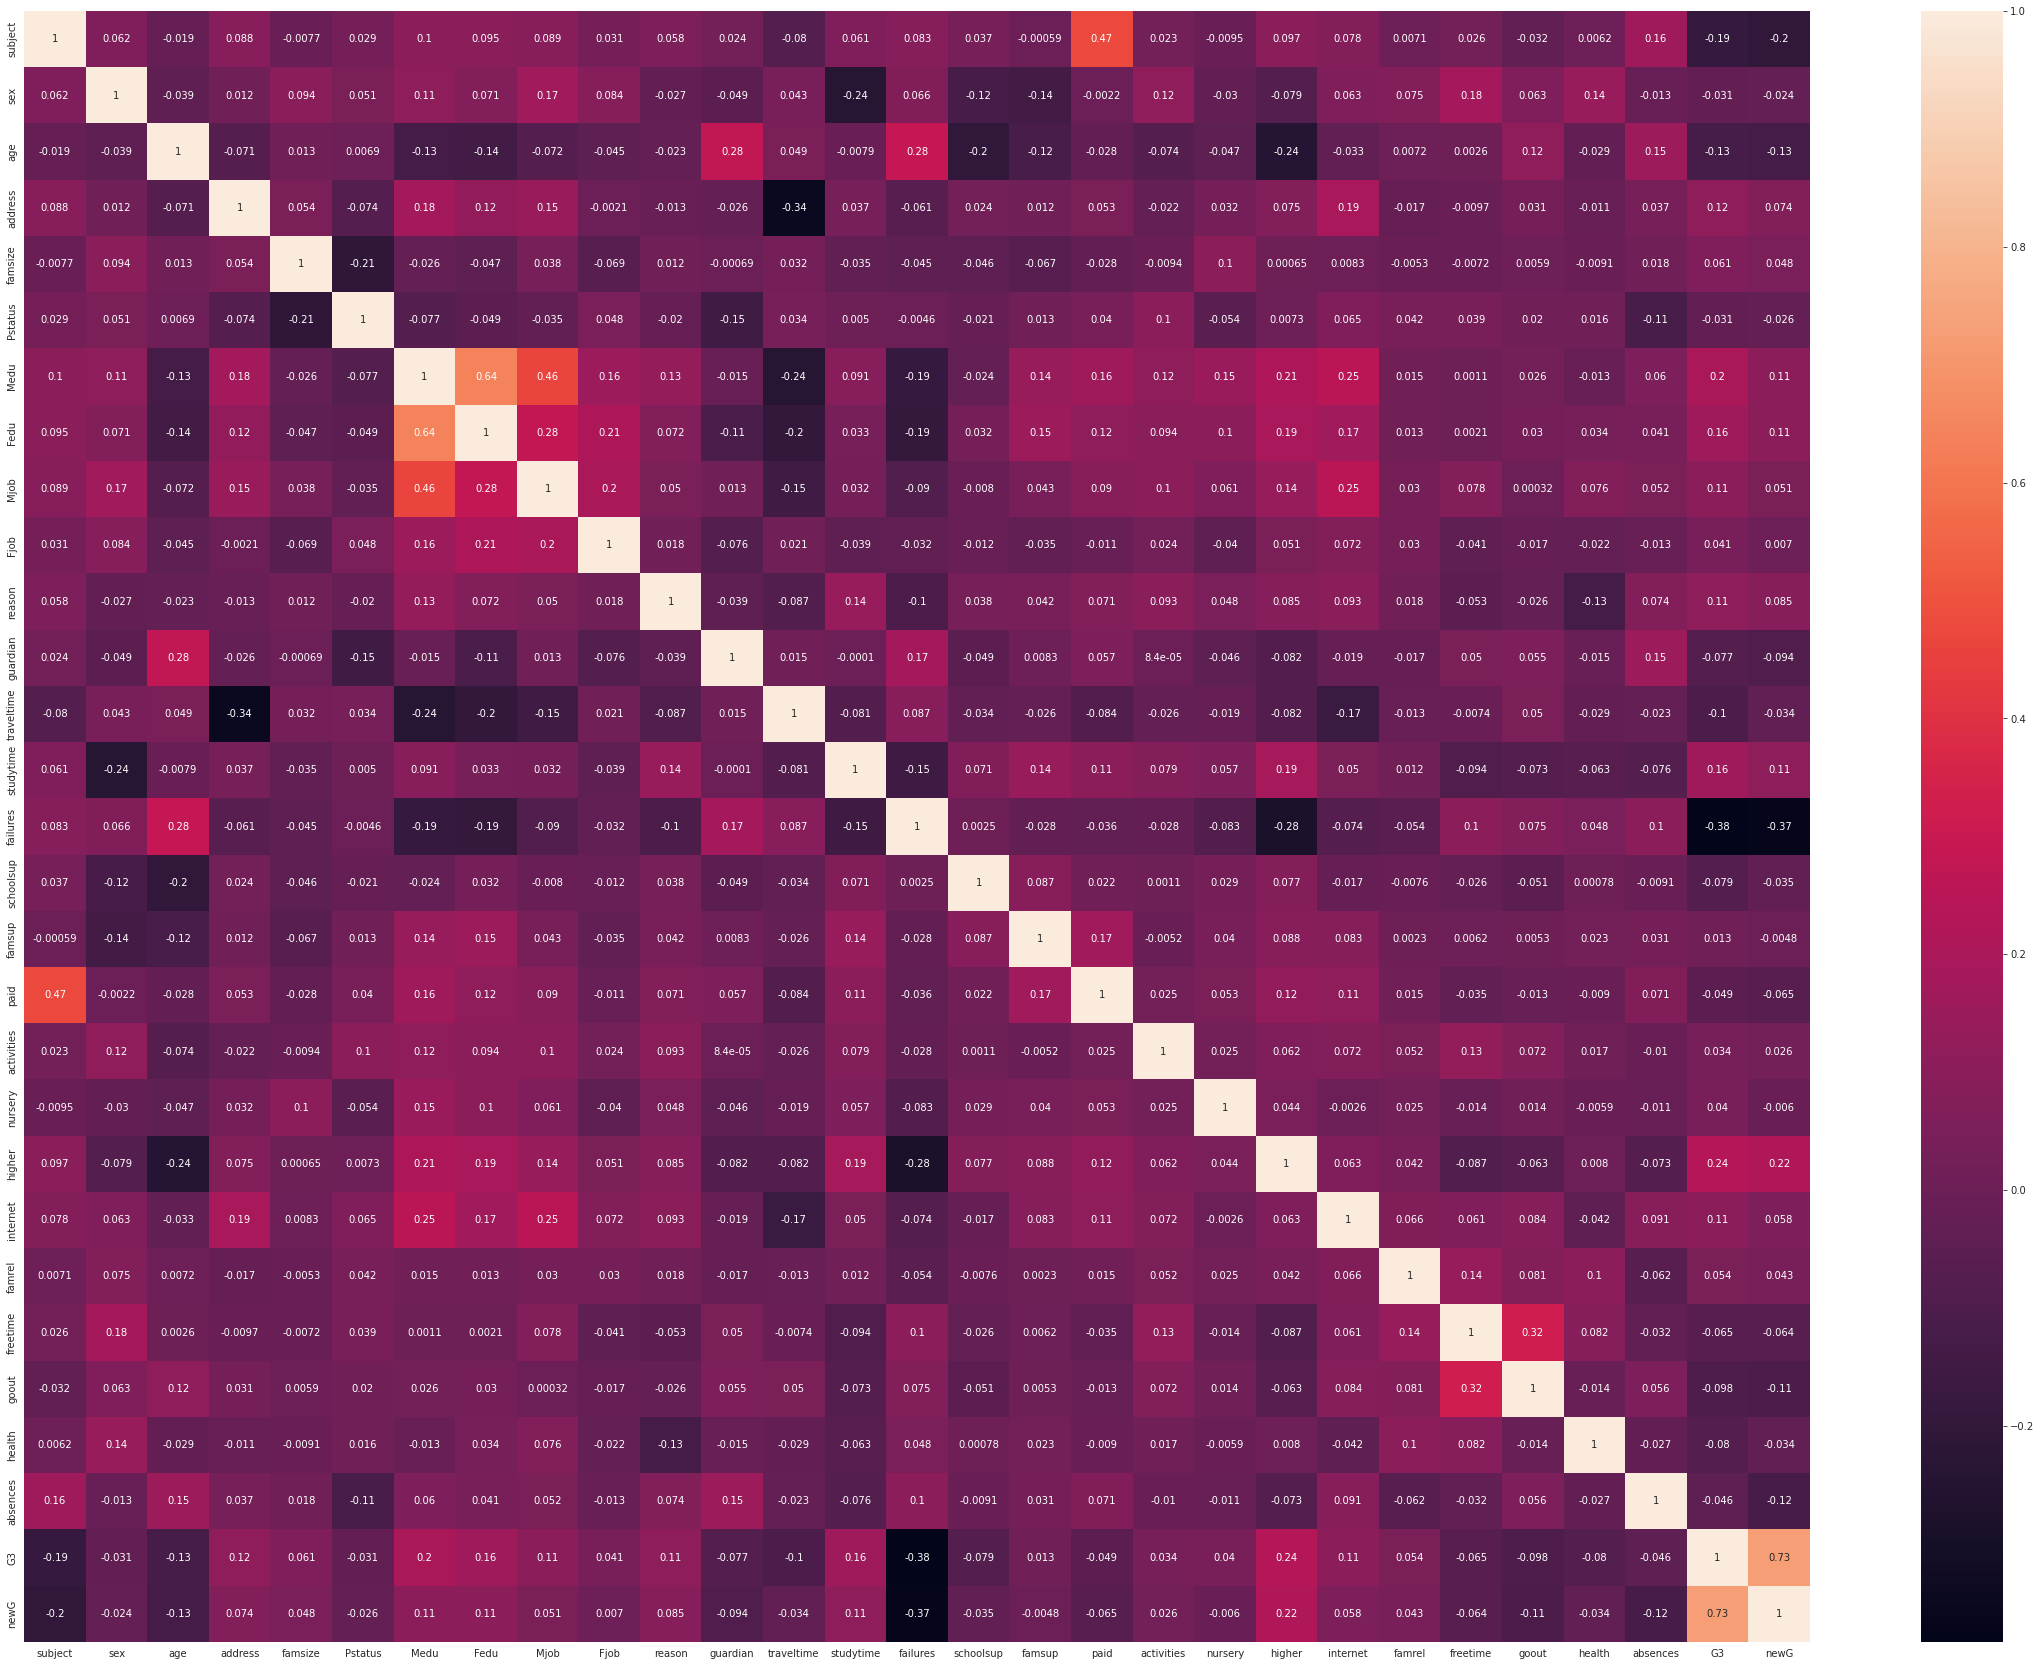

In [28]:
#Visualizing correlation 
plt.figure(figsize=(40,30))
sns.heatmap(data.corr(), annot=True)

In [29]:
#Creat a list of correlation values 
corrList = corrnew.unstack()
orderedCorrList = corrList.sort_values(ascending=False, kind="quicksort")

#reduce the list by removing the correlation of 1 which we made sure it includes only the one variable to its self
StrongCorr = (orderedCorrList.iloc[30:,])

In [30]:
#print the strong positive correlations
print(StrongCorr[StrongCorr>0.5])

newG  G3      0.729693
Medu  Fedu    0.642063
Fedu  Medu    0.642063
dtype: float64


In [31]:
#print the strong negative correlations
print(StrongCorr[StrongCorr<-0.5])

Series([], dtype: float64)


# feature engineering

In [32]:
#np.random.seed(10)
#data = np.random.normal(100, 20, 200)
 
#fig = plt.figure(figsize =(8, 5))

# Creating plot
#plt.boxplot(data)
 
# show plot
#plt.show()

In [33]:
# finding the 1st quartile
#q1 = np.quantile(data, 0.25)
 
# finding the 3rd quartile
#q3 = np.quantile(data, 0.75)

#med = np.median(data)
 
# finding the iqr region
#iqr = q3-q1
 
# finding upper and lower whiskers
#upper_bound = q3+(1.5*iqr)
#lower_bound = q1-(1.5*iqr)

#print(iqr, upper_bound, lower_bound)

In [34]:
#outliers = data[(data < lower_bound) | (data > upper_bound)]

#print('The following are the outliers in the boxplot:{}'.format(outliers))

In [35]:
# boxplot of data within the whisker

#arr2 = data[(data >= lower_bound) & (data <= upper_bound)]

#plt.figure(figsize=(12, 7))
#plt.boxplot(arr2)
#plt.show()

 Separating the dependent and independent variables

In [36]:
X=data.copy()
X.drop('newG',axis=1,inplace=True)
y=data['newG']

1    814
0    230
Name: newG, dtype: int64

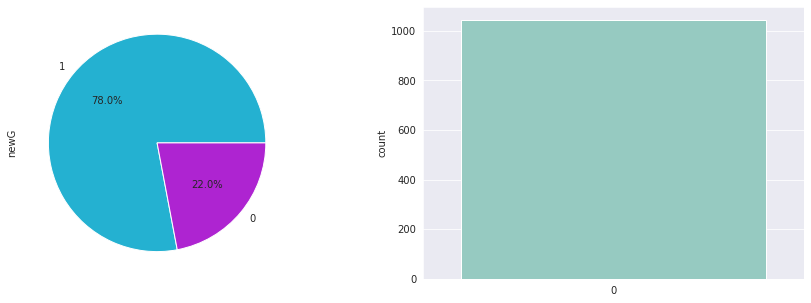

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%',colors=('#24b1d1', '#ae24d1'))
plt.subplot(1,2,2)
sns.countplot(y,palette="Set3")
y.value_counts()

In [38]:
# #Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [39]:
X,y=over.fit_resample(X,y)

In [40]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [41]:
xd=scaler.fit_transform(X)
X=pd.DataFrame(xd,columns=X.columns)

0    814
1    814
Name: newG, dtype: int64

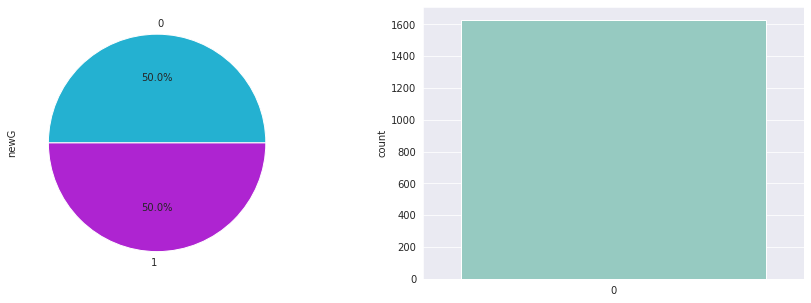

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%',colors=('#24b1d1', '#ae24d1'))
plt.subplot(1,2,2)
sns.countplot(y,palette="Set3")
y.value_counts()

In [43]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(xd)

data_reduced = pca.transform(xd)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

total_explained_var=0
num_components=0
for ex in explained_variance:
  total_explained_var+= ex
  num_components+=1
  if total_explained_var>=0.95:
     break

In [44]:
# Print the minimum number of PCs required to cover the 95%of the variance of the original (scaled) data.
num_components = np.argwhere(np.cumsum(explained_variance) >= 0.95)[0][0] + 1
print("Minimum number of PCs required to cover 95% variance:", num_components)

Minimum number of PCs required to cover 95% variance: 22


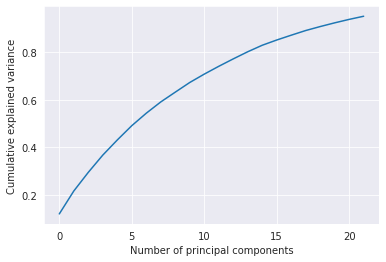

In [45]:
#Plot the cumulative explained variance vs. the number of principal components.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [46]:
# Print the percentage of the variance that is covered by the first and second PCs.
pc1 =round(pca.explained_variance_ratio_[0]*100)
pc2 =round(pca.explained_variance_ratio_[1]*100)
print("The variance covered by 1st PC:", pc1, "% approximately")
print("The variance covered by 2nd PC:", pc2, "% approximately")

The variance covered by 1st PC: 12 % approximately
The variance covered by 2nd PC: 10 % approximately


In [47]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject     1044 non-null   float64
 1   sex         1044 non-null   float64
 2   age         1044 non-null   int64  
 3   address     1044 non-null   float64
 4   famsize     1044 non-null   float64
 5   Pstatus     1044 non-null   float64
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   float64
 9   Fjob        1044 non-null   float64
 10  reason      1044 non-null   float64
 11  guardian    1044 non-null   float64
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   float64
 16  famsup      1044 non-null   float64
 17  paid        1044 non-null   float64
 18  activities  1044 non-null   float64
 19  nursery     1044 non-null  

 # Split the dataset into training and teasting

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape) #shape 

(1139, 28) (489, 28) (1139,) (489,)


# Multiple Linear regression MLR

Check x

In [49]:
print(X)

       subject       sex       age   address  famsize   Pstatus  Medu  Fedu  \
0     1.000000  0.000000  0.428571  1.000000      0.0  0.000000  1.00  1.00   
1     1.000000  0.000000  0.285714  1.000000      0.0  1.000000  0.25  0.25   
2     1.000000  0.000000  0.000000  1.000000      1.0  1.000000  0.25  0.25   
3     1.000000  0.000000  0.000000  1.000000      0.0  1.000000  1.00  0.50   
4     1.000000  0.000000  0.142857  1.000000      0.0  1.000000  0.75  0.75   
...        ...       ...       ...       ...      ...       ...   ...   ...   
1623  0.043387  0.043387  0.142857  0.043387      1.0  1.000000  0.25  0.25   
1624  0.000000  0.000000  0.428571  0.958967      0.0  1.000000  0.25  0.25   
1625  1.000000  0.000000  0.285714  0.000000      0.0  1.000000  1.00  0.75   
1626  1.000000  0.000000  0.285714  0.247637      0.0  0.247637  0.75  0.50   
1627  1.000000  0.000000  0.000000  1.000000      1.0  0.533158  0.75  0.50   

          Mjob      Fjob  ...  activities   nursery

Train the model on the training set

In [50]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train, y_train)

LinearRegression()

Predict the test set results

In [51]:
y_pred=MLR.predict(X_test)
print(y_pred)

[ 4.16521853e-01  5.64691943e-01  6.25857785e-01  6.89018241e-01
  6.19236669e-01  3.90415302e-01 -1.20330477e-01  1.25291554e-01
 -2.76797953e-01  6.23043971e-01  6.90482175e-01  1.10605510e-01
  5.72415938e-01  4.33685581e-01  7.59987685e-01  8.99404310e-01
  2.86378602e-01  1.33001651e+00  1.62779390e-01  2.94720808e-01
 -2.92095799e-01  1.66451026e-01  2.73049769e-01  3.17094826e-01
  4.43813238e-01  3.89818981e-01  1.08030022e+00  5.93367149e-01
  7.97662887e-01  1.26644108e+00  1.02500608e+00 -9.67823657e-03
  3.41846444e-01  1.92285608e-01  9.37244400e-01 -2.71622080e-01
  2.02180746e-01  3.77337980e-01  1.24469712e-01  5.15924663e-01
  8.34084738e-01  1.06059221e+00  3.32078835e-01  6.82175182e-01
 -5.64018849e-03  9.88276688e-01 -2.51901458e-01  1.04625790e+00
  1.24394278e+00 -5.78260761e-03 -7.13579565e-02 -1.88400957e-01
  1.14805008e+00  8.92766568e-01  1.20760686e+00  9.60070597e-01
  4.43568598e-01  9.53499506e-01  6.50971594e-01  1.03833454e+00
  6.24936023e-01  4.06898

Evaluate the model 

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6143368703263856

Plot the results 

Text(0.5, 1.0, 'Actual vs. Predicted')

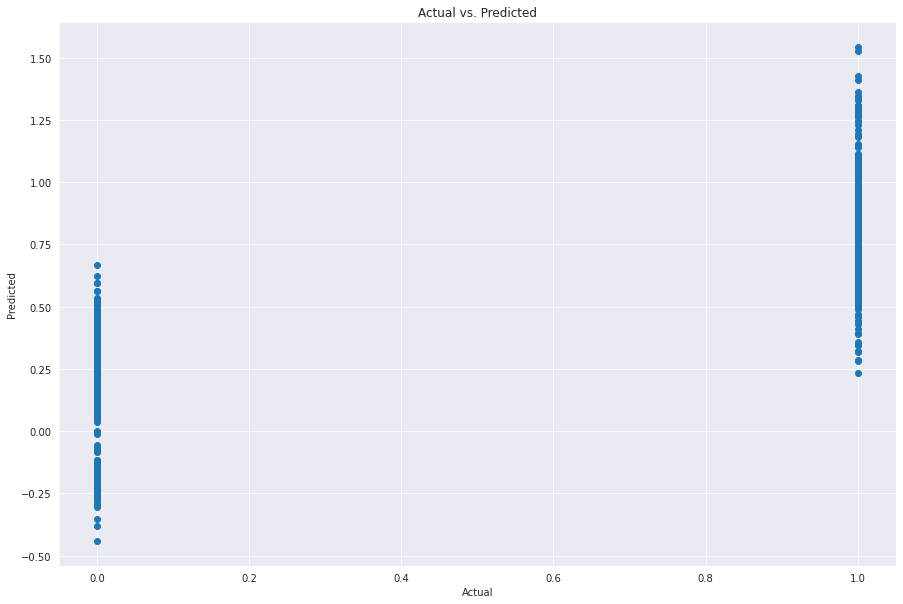

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15, 10) )
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [54]:
pred_y_df=pd.DataFrame ({'Actual Value':y_test,'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
1197,0,0.416522,-0.416522
587,1,0.564692,0.435308
602,1,0.625858,0.374142
527,1,0.689018,0.310982
76,1,0.619237,0.380763
965,0,0.390415,-0.390415
1263,0,-0.120330,0.120330
1500,0,0.125292,-0.125292
1392,0,-0.276798,0.276798
927,0,0.623044,-0.623044


In [55]:
# #get the locations
# X = data.iloc[:, :-1]
# y = data.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.30, random_state=0)

# Classification models:

In [70]:
# #To report performances of each model
def performance(p,ytest,m,xtest,s):
    print('********************',m,'********************')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [71]:
# #Creating a list of models which will be created one by one
models=[SVC(gamma="auto"), GaussianNB(), DecisionTreeClassifier()]     

In [72]:
#Creates and trains model from the models list
results = []
names = ["SVM","NB","CART"]
def createmodel(trainx,testx,trainy,testy):
    for i in models:
        model=i
        model.fit(trainx,trainy)
        p=model.predict(testx)
        score=cross_val_score(model,X,y,cv=10)
        results.append(score)
        performance(p,testy,model,testx,score) 
        

In [73]:
createmodel(X_train,X_test,y_train,y_test)

******************** SVC(gamma='auto') ********************
Accuracy 0.9777
----------------------------------------------------------
Mean of Cross Validation Score 0.9664
----------------------------------------------------------
Confusion Matrix
[[ 53   2]
 [  5 254]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.99      0.98      0.99       259

    accuracy                           0.98       314
   macro avg       0.95      0.97      0.96       314
weighted avg       0.98      0.98      0.98       314

******************** GaussianNB() ********************
Accuracy 0.8854
----------------------------------------------------------
Mean of Cross Validation Score 0.8553
----------------------------------------------------------
Confusion Matrix
[[ 42  20]
 [ 16 236]]
-----------------------------------------------------

In [ ]:
# #Fitting the Multiple Linear Regression model

# mlr = LinearRegression()  
# mlr.fit(X_train, y_train)
# pred = mlr.predict(X_test)

# #Printing Confusiob matrix, classification report and accuracy report 
# print(confusion_matrix(y_test,pred))
# print(classification_report(y_test,pred))
# print(accuracy_score(y_test,pred))

# Comparing the results

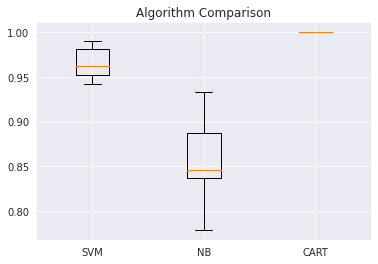

In [74]:
# # Compare models' accuracy using box plot
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Changing the SVM parameters

In [75]:
parameters={'C':[1, 10, 20],  'gamma': [1,0.1,0.01,0.001,0.0001],'kernel':['linear', 'poly', 'rbf','sigmoid'],'degree':[1,2,3,4],'probability':[True, False]}

In [76]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),parameters,cv=10)

In [77]:
# #Warning: it take too long
grid .fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'degree': [1, 2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False]})

In [78]:
print ("Best parameters: ")
print(grid.best_params_)
print ("The model to use: ")
print(grid.best_estimator_)
print ("Best Score: ")
print(grid.best_score_)

Best parameters: 
{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'linear', 'probability': True}
The model to use: 
SVC(C=1, degree=1, gamma=1, kernel='linear', probability=True)
Best Score: 
1.0


In [79]:
m=SVC(C=1, degree=1, gamma=1, kernel='linear', probability=True)
m.fit(X_train,y_train)
p=m.predict(X_test)
score=cross_val_score(m,X,y,cv=10)

In [80]:
performance(p,y_test,m,X_test,score)

******************** SVC(C=1, degree=1, gamma=1, kernel='linear', probability=True) ********************
Accuracy 1.0
----------------------------------------------------------
Mean of Cross Validation Score 1.0
----------------------------------------------------------
Confusion Matrix
[[ 58   0]
 [  0 256]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       256

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



# Modelling

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data['subject']=encoder.fit_transform(data['subject'])
data['sex']=encoder.fit_transform(data['sex'])
data['age']=encoder.fit_transform(data['age'])
data['address']=encoder.fit_transform(data['address'])
data['famsize']=encoder.fit_transform(data['famsize'])
data['Pstatus']=encoder.fit_transform(data['Pstatus'])
data['Medu']=encoder.fit_transform(data['Medu'])
data['Fedu']=encoder.fit_transform(data['Fedu'])
data['Mjob']=encoder.fit_transform(data['Mjob'])
data['Fjob']=encoder.fit_transform(data['Fjob'])
data['reason']=encoder.fit_transform(data['reason'])
data['guardian']=encoder.fit_transform(data['guardian'])
data['traveltime']=encoder.fit_transform(data['traveltime'])
data['studytime']=encoder.fit_transform(data['studytime'])
data['failures']=encoder.fit_transform(data['failures'])
data['schoolsup']=encoder.fit_transform(data['schoolsup'])
data['famsup']=encoder.fit_transform(data['famsup'])
data['paid']=encoder.fit_transform(data['paid'])
data['activities']=encoder.fit_transform(data['activities'])
data['nursery']=encoder.fit_transform(data['nursery'])
data['higher']=encoder.fit_transform(data['higher'])
data['internet']=encoder.fit_transform(data['internet'])
data['famrel']=encoder.fit_transform(data['famrel'])
data['freetime']=encoder.fit_transform(data['freetime'])
data['goout']=encoder.fit_transform(data['goout'])
data['health']=encoder.fit_transform(data['health'])
data['absences']=encoder.fit_transform(data['absences'])
# newDF['G1']=encoder.fit_transform(newDF['G1'])
# newDF['G2']=encoder.fit_transform(newDF['G2'])
data['G3']=encoder.fit_transform(data['G3'])

data

,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,famrel,freetime,goout,health,absences,G3,newG
0,1,0,3,1,0,0,4,4,0,4,...,1,1,0,3,2,3,2,6,4,0
1,1,0,2,1,0,1,1,1,0,2,...,0,1,1,4,2,2,2,4,4,0
2,1,0,0,1,1,1,1,1,0,2,...,1,1,1,3,2,1,2,10,8,1
3,1,0,0,1,0,1,4,2,1,3,...,1,1,1,2,1,1,4,2,13,1
4,1,0,1,1,0,1,3,3,2,2,...,1,1,0,3,2,1,4,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,4,0,0,1,2,3,3,2,...,0,1,1,4,3,1,4,4,8,1
1040,0,0,3,1,1,1,3,1,4,3,...,1,1,1,3,2,3,0,4,14,1
1041,0,0,3,1,0,1,1,1,2,2,...,1,1,0,0,0,0,4,6,7,0
1042,0,1,2,1,1,1,3,1,3,3,...,0,1,1,1,3,4,1,6,8,1


In [82]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# # get the locations
# X = newDF.iloc[:, :-1]
# y = newDF.iloc[:, -1]
 
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

#outPut:
#X_train
#y_train
#X_test
y_test

247     0
1014    1
766     1
892     1
97      1
408     1
511     1
994     1
85      0
1000    0
651     0
472     1
342     1
772     1
613     1
267     1
895     0
956     1
122     1
852     1
31      1
489     1
298     1
253     0
821     1
1       0
521     1
27      1
926     1
308     1
252     0
412     1
529     1
650     0
698     1
272     1
859     1
803     1
18      0
382     1
531     1
546     1
192     0
1010    1
564     1
436     1
214     1
418     1
372     1
664     1
732     1
568     1
601     1
Name: newG, dtype: int64

# Naive Bayes

In [ ]:
#NB

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Printing Confusiob matrix, classification report and accuracy report 
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
acc=accuracy_score(y_test,pred)
print(acc)

[[10  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.97      0.93      0.95        42

    accuracy                           0.92        53
   macro avg       0.87      0.92      0.89        53
weighted avg       0.93      0.92      0.93        53

0.9245283018867925


Confusion matrix


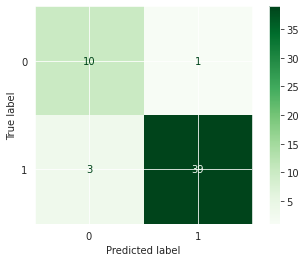

Normalized confusion matrix


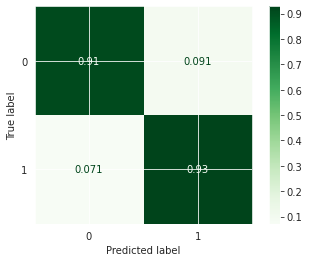

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#confusion matrix without Normalization
print ('Confusion matrix')
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap ='Greens')  
plt.show()

#Normalized confusion matrix Noteeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
print ('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap ='Greens')  
plt.show()

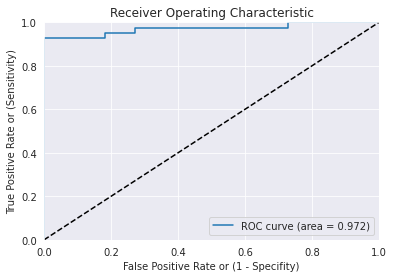

In [ ]:
y_score = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,y_score)
roc_auc = roc_auc_score(y_test,y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");

In [ ]:
print('Accuracy Score:')
GNB_accuracy = accuracy_score(y_test,pred)
print(GNB_accuracy)


Accuracy Score:
0.9245283018867925


In [ ]:
print('ROC AUC Score:')
GNB_auc = roc_auc_score(y_test, y_score)
print(GNB_auc)

ROC AUC Score:
0.9718614718614718


# Random Forest

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))


[[10  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.97      0.93      0.95        42

    accuracy                           0.92        53
   macro avg       0.87      0.92      0.89        53
weighted avg       0.93      0.92      0.93        53

0.9245283018867925


Confusion matrix


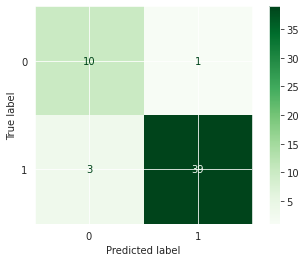

Normalized confusion matrix


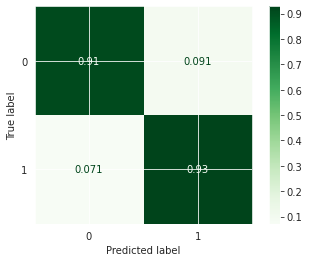

In [ ]:
##confusion matrix without Normalization
from sklearn.metrics import ConfusionMatrixDisplay

print ('Confusion matrix')
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap ='Greens')  
plt.show()

#Normalized confusion matrix
print ('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap ='Greens')  
plt.show() 

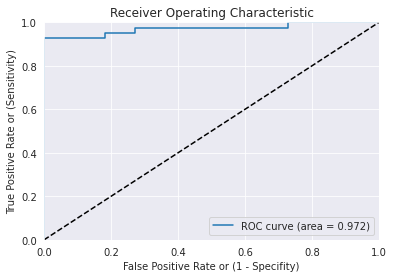

In [ ]:
y_score = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,y_score)
roc_auc = roc_auc_score(y_test,y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");

In [ ]:
print('Accuracy Score:')
RF_accuracy = accuracy_score(y_test,pred)
print(RF_accuracy)

Accuracy Score:
0.9245283018867925


In [ ]:
print('ROC AUC Score:')
RF_auc = roc_auc_score(y_test, y_score)
print(RF_auc)

ROC AUC Score:
0.9718614718614718


In [ ]:
# plt.plot(acc, label='Training accuracy')
# plt.plot(val_acc, label='Validation accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Plot the loss curves
# plt.plot(train_loss, label='Training loss')
# plt.plot(val_loss, label='Validation loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()